In [2]:
import yfinance as yf
from datetime import datetime

# Define the tickers for the top 20 cryptocurrencies
tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'USDT-USD', 'ADA-USD', 'XRP-USD', 
           'DOGE-USD', 'USDC-USD', 'DOT1-USD', 'UNI3-USD', 'BCH-USD', 'LTC-USD', 
           'LINK-USD', 'MATIC-USD', 'XLM-USD', 'WBTC-USD', 'THETA-USD', 'ETC-USD', 
           'VET-USD', 'FIL-USD']

# Define the start and end date
start_date = datetime(2019, 10, 1)
end_date = datetime.now()

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Select only the 'Close' prices
data = data['Close']

print(data)


[*********************100%***********************]  20 of 20 completed
             ADA-USD     BCH-USD     BNB-USD       BTC-USD  DOGE-USD  \
Date                                                                   
2019-10-01  0.038507  224.761902   15.903211   8343.276367  0.002388   
2019-10-02  0.039445  225.893616   15.950048   8393.041992  0.002351   
2019-10-03  0.038361  222.579086   15.726760   8259.992188  0.002325   
2019-10-04  0.039667  223.250809   15.755114   8205.939453  0.002360   
2019-10-05  0.039730  223.165344   15.723580   8151.500488  0.002322   
...              ...         ...         ...           ...       ...   
2023-07-09  0.284591  265.548981  234.228363  30171.234375  0.065435   
2023-07-10  0.287991  274.585510  245.874268  30414.470703  0.065243   
2023-07-11  0.292818  274.030548  248.538330  30620.951172  0.065287   
2023-07-12  0.288758  282.501160  244.019882  30391.646484  0.065071   
2023-07-13  0.337310  270.361572  251.573410  31142.890625  0.068

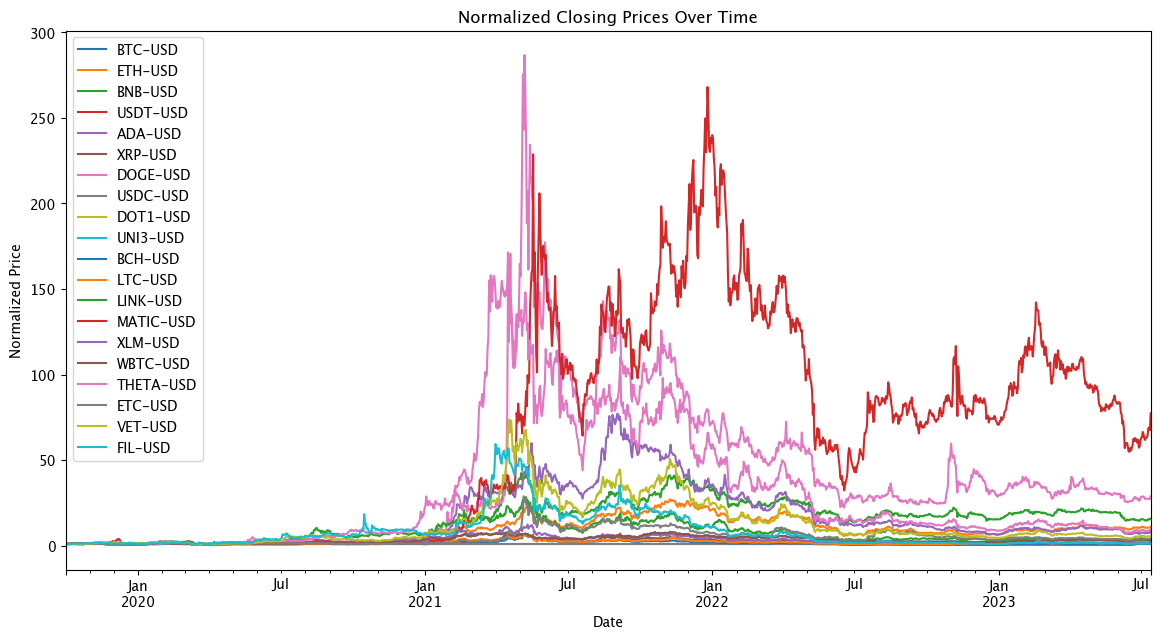

In [5]:
import matplotlib.pyplot as plt

# Normalize the data
data_normalized = data / data.iloc[0]

# Create a new figure
plt.figure(figsize=(14, 7))

# Plot the normalized closing prices for each asset
for ticker in tickers:
    data_normalized[ticker].plot(label=ticker)

# Add title, labels, and legend
plt.title('Normalized Closing Prices Over Time')
plt.ylabel('Normalized Price')
plt.xlabel('Date')
plt.legend()

# Show the plot
plt.show()


[*********************100%***********************]  20 of 20 completed


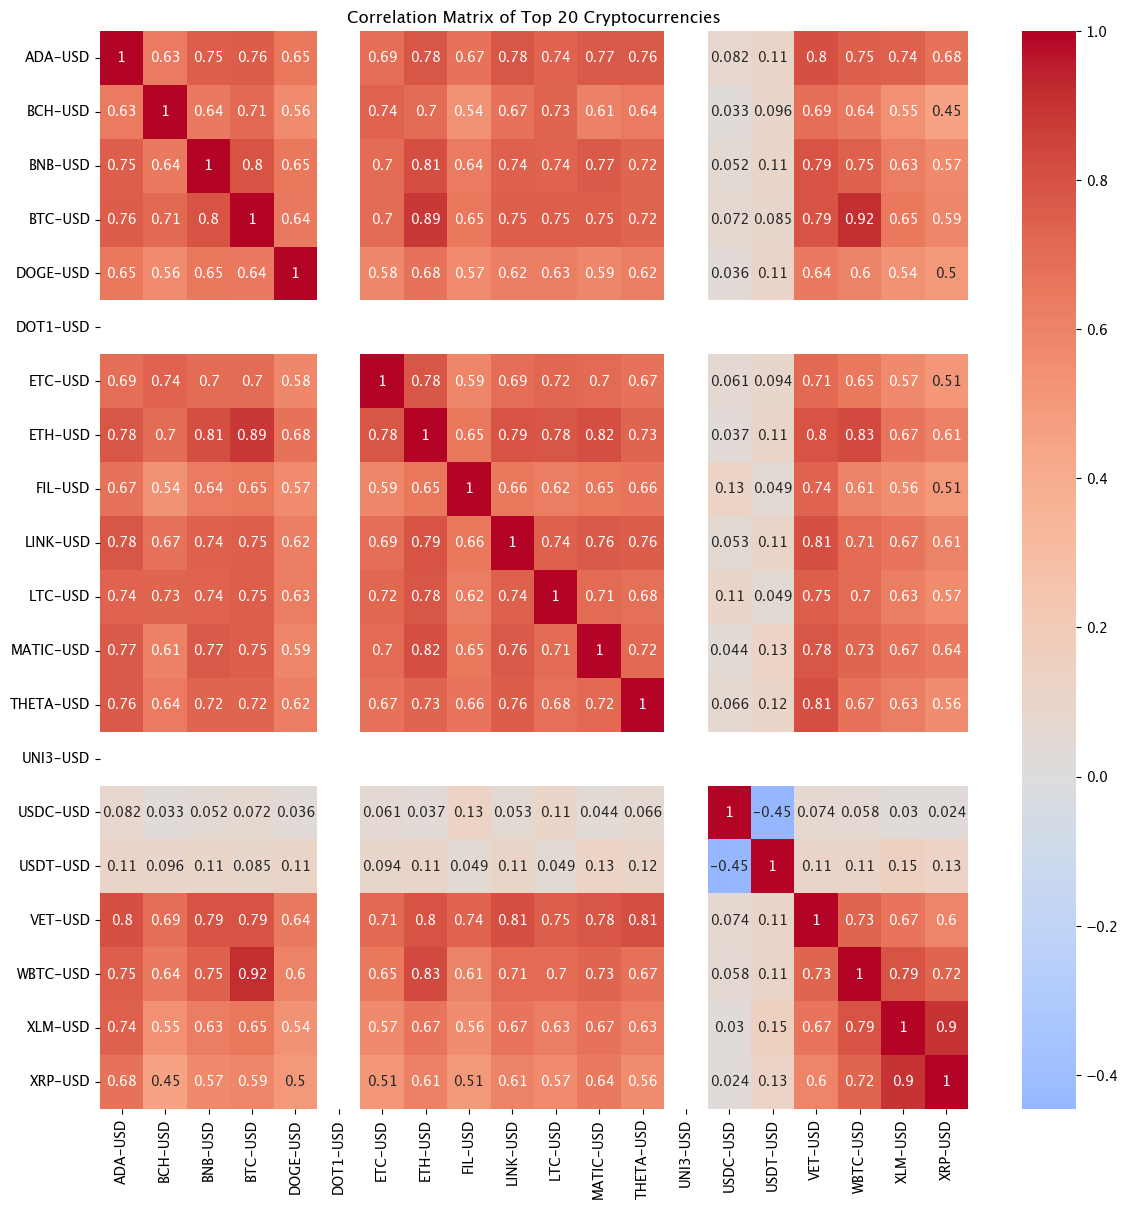

In [3]:
import yfinance as yf
from datetime import datetime
import seaborn as sns

# Define the tickers for the top 20 cryptocurrencies
tickers = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'USDT-USD', 'ADA-USD', 'XRP-USD', 
           'DOGE-USD', 'USDC-USD', 'DOT1-USD', 'UNI3-USD', 'BCH-USD', 'LTC-USD', 
           'LINK-USD', 'MATIC-USD', 'XLM-USD', 'WBTC-USD', 'THETA-USD', 'ETC-USD', 
           'VET-USD', 'FIL-USD']

# Define the start and end date
start_date = datetime(2019, 10, 1)
end_date = datetime.now()

# Download the data
data = yf.download(tickers, start=start_date, end=end_date)

# Select only the 'Close' prices
data = data['Close']

# Calculate the daily returns
returns = data.pct_change()

# Drop the rows with missing values
returns = returns.dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top 20 Cryptocurrencies')
plt.show()


In [7]:
# Calculate the correlation matrix
correlation_matrix = data_normalized.pct_change().corr()

# Create a boolean mask for pairs with a correlation of at least 0.8
mask = correlation_matrix > 0.8

# Apply the mask to the correlation matrix
high_correlation = correlation_matrix[mask]

# Drop rows and columns with no high correlations
high_correlation = high_correlation.dropna(how='all').dropna(axis=1, how='all')

#print(high_correlation)


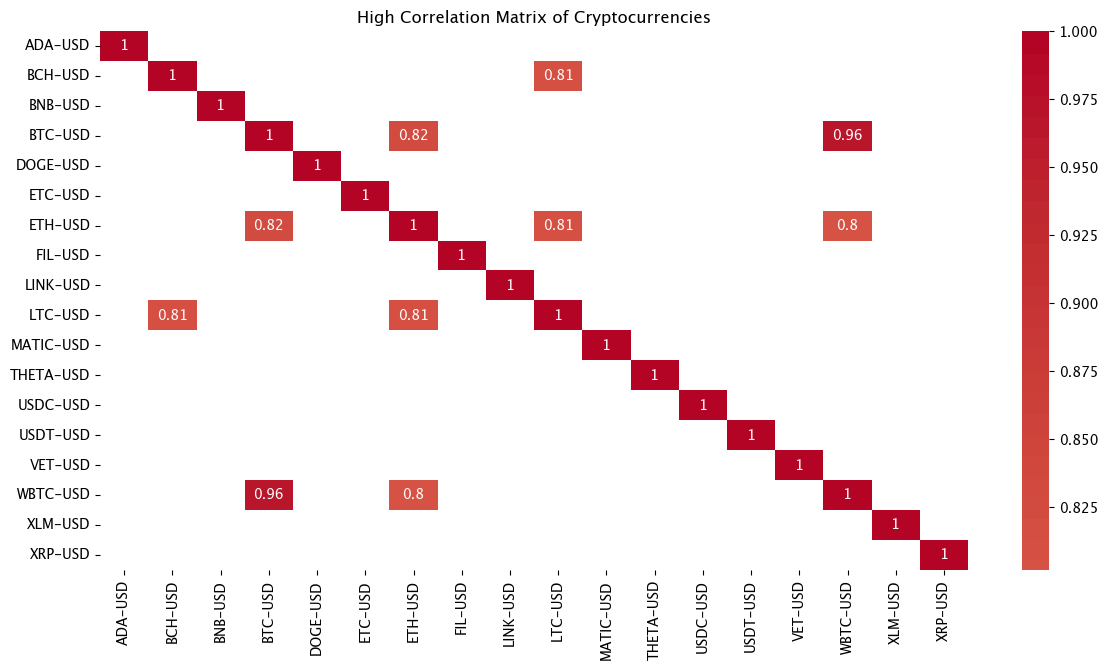

In [8]:
import seaborn as sns

# Create a heatmap of the high correlation matrix
plt.figure(figsize=(14, 7))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('High Correlation Matrix of Cryptocurrencies')
plt.show()


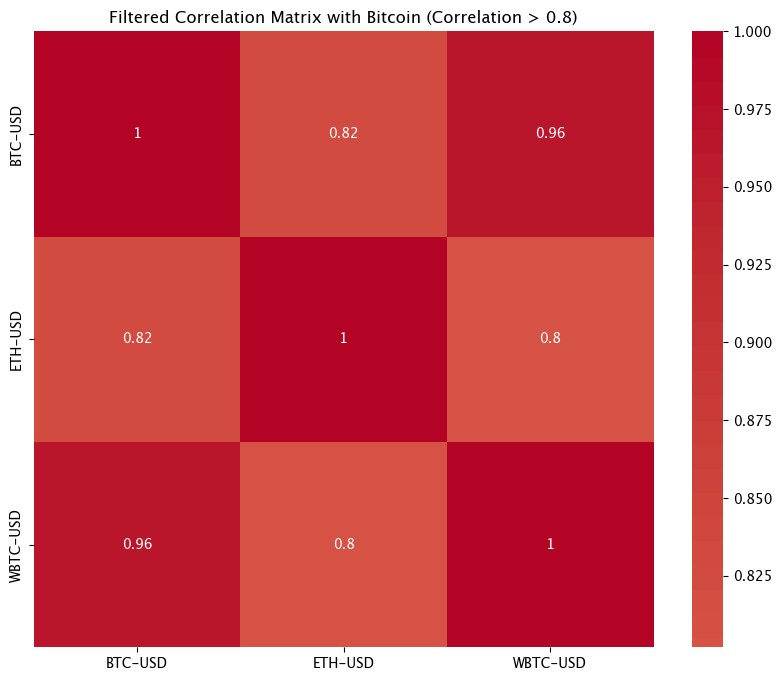

In [9]:
# Filter the correlation matrix for currencies correlated with Bitcoin over 0.8
bitcoin_correlation = correlation_matrix['BTC-USD'][correlation_matrix['BTC-USD'] > 0.8]

# Filter the correlation matrix for currencies that are over 0.8 with Bitcoin
filtered_correlation = correlation_matrix.loc[bitcoin_correlation.index, bitcoin_correlation.index]

# Create a heatmap of the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Filtered Correlation Matrix with Bitcoin (Correlation > 0.8)')
plt.show()


In [11]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the tickers for Bitcoin and S&P 500
tickers = ['BTC-USD', '^GSPC']

# Define the start and end date
start_date = datetime(2019, 10, 1)
end_date = datetime.now()

# Download the market capitalization data
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')['Market Cap']

# Normalize the market capitalization data
data_normalized = data / data.iloc[0]

# Plot the market capitalization growth
plt.figure(figsize=(14, 7))
data_normalized.plot()
plt.title('Market Capitalization Growth: Bitcoin vs S&P 500')
plt.ylabel('Normalized Market Cap')
plt.xlabel('Date')
plt.legend(tickers)
plt.show()


[*********************100%***********************]  2 of 2 completed


KeyError: 'Market Cap'

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the tickers for Bitcoin and S&P 500
tickers = ['BTC-USD', '^GSPC']

# Define the start and end date
start_date = datetime(2019, 10, 1)
end_date = datetime.now()

# Download the market capitalization data
data = yf.download(tickers, start=start_date, end=end_date, group_by='column')['MarketCap']

# Normalize the market capitalization data
data_normalized = data / data.iloc[0]

# Plot the market capitalization growth
plt.figure(figsize=(14, 7))
data_normalized.plot()
plt.title('Market Capitalization Growth: Bitcoin vs S&P 500')
plt.ylabel('Normalized Market Cap')
plt.xlabel('Date')
plt.legend(tickers)
plt.show()


[*********************100%***********************]  2 of 2 completed


KeyError: 'MarketCap'